# Holiday Crimes in Michigan 2018

__Questions to resolve__: 
* How the number of crimes is affected on holidays?
* Is is possible the number of incidents increase in those kind of days?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib notebook

# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

### Getting Dataset

In [2]:
# SOURCE: 2018: https://www.officeholidays.com/countries/usa/michigan/2018
# scrap tool: https://www.convertcsv.com/html-table-to-csv.htm
holidays = pd.read_csv('michigan-holidays_2018.csv')
holidays.set_index('Day',inplace=True)
holidays.head()

,Date,Holiday Name,Type,Comments
Day,,,,
2018-01-01,Jan 01,New Year's Day,Federal Holiday,NaN
2018-01-15,Jan 15,Martin Luther King Jr. Day,Federal Holiday,3rd Monday in January
2018-02-19,Feb 19,President's Day,Federal Holiday,3rd Monday in February
2018-05-13,May 13,Mother's Day,Not A Public Holiday,2nd Sunday in May. Not a public holiday
2018-05-28,May 28,Memorial Day,Federal Holiday,Last Monday in May


In [3]:
#SOURCE: https://crime-data-explorer.fr.cloud.gov/downloads-and-docs
#MI-2018

incidents = pd.read_csv('nibrs_incident_2018.csv')
incidents.columns = map(str.lower, incidents.columns)
incidents.head(3)

,data_year,agency_id,incident_id,nibrs_month_id,cargo_theft_flag,submission_date,incident_date,report_date_flag,incident_hour,cleared_except_id,cleared_except_date,incident_status,data_home,orig_format,did
0,2018,9049,101609467,8361019,NaN,31-OCT-18,03-SEP-18,R,6.0,6,NaN,0,C,F,28499253
1,2018,9049,101609472,8361019,NaN,31-OCT-18,03-SEP-18,R,5.0,6,NaN,0,C,F,28499256
2,2018,9049,101612591,8361019,N,31-OCT-18,02-SEP-18,R,8.0,6,NaN,0,C,F,28504012


### Processing Data

In [4]:
incidents.incident_date =  pd.to_datetime(incidents.incident_date)
incidents.set_index('incident_date', inplace=True)
incidents.head()

incidents = (incidents.resample('D')
                      .incident_id.count()
                      .to_frame()
                      .rename(columns={'incident_id':'incident_count'}) )

incidents[incidents.index.month==1].head(2)

,incident_count
incident_date,
2018-01-01,1465
2018-01-02,1108


In [5]:
incidents_mean = (incidents.groupby(pd.Grouper(freq='M'))
                                      .mean()
                                      .rename(columns={'incident_count':'incident_mean'}))

incidents_mean[incidents_mean.index.month==1].head(2)

,incident_mean
incident_date,
2018-01-31,1213.645161


In [6]:
incidents['incident_mean'] = 0
for i in range(1,13):
    incidents.at[incidents.index.month==i, 'incident_mean'] = incidents_mean[incidents_mean.index.month==i].incident_mean.mean()

incidents[incidents.index.month==1].head(2)

,incident_count,incident_mean
incident_date,,
2018-01-01,1465,1213.645161
2018-01-02,1108,1213.645161


### Plotting

<IPython.core.display.Javascript object>


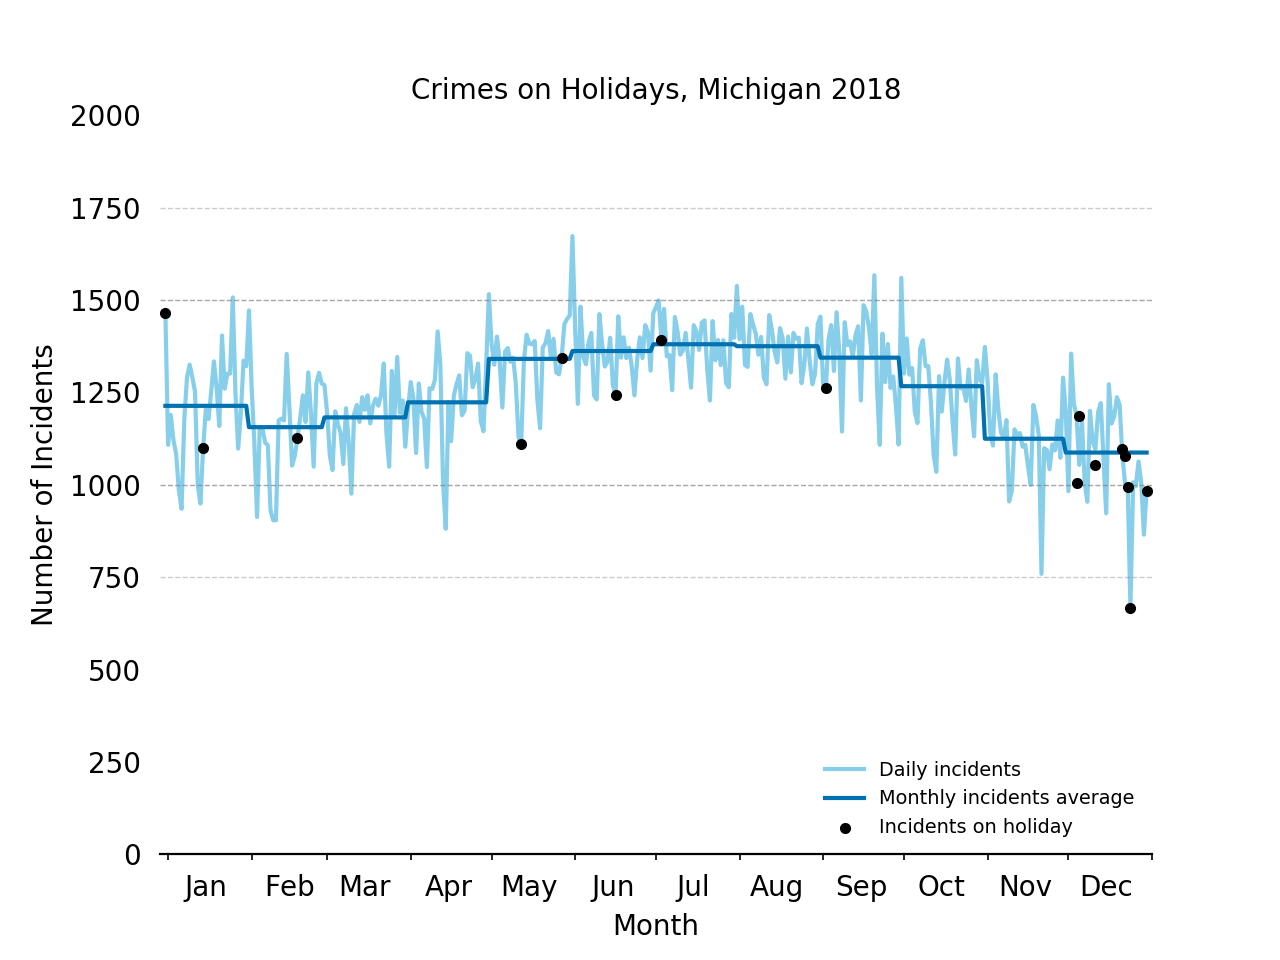

(17530, 17898)

In [8]:
fig, ax = plt.subplots()#figsize=(9,5))

incidents.incident_count.plot(kind='line', color='skyblue', ax=ax, label='Daily incidents')
incidents.incident_mean.plot(ax=ax, label='Monthly incidents average')

#holidays
holiday_dates = holidays.index.values
holi = incidents.loc[incidents.index.isin(holiday_dates)]
ax.scatter(holiday_dates, holi.incident_count, zorder=10, color='black', marker='.', label='Incidents on holiday')

#styles
ax.legend(loc=4, fontsize='x-small', frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title('Crimes on Holidays, Michigan 2018', fontsize='medium')
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.tick_params(axis='x', which='major', bottom=False)
ax.tick_params(axis='y', which='major', left=False)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Incidents');
ax.axhline(y=1750, linestyle='--', color='gray', linewidth=0.5, alpha=0.4)
ax.axhline(y=1500, linestyle='--', color='gray', linewidth=0.5, alpha=0.7)
ax.axhline(y=1000, linestyle='--', color='gray', linewidth=0.5, alpha=0.7)
ax.axhline(y=750, linestyle='--', color='gray', linewidth=0.5, alpha=0.4)
ax.set_ylim(0,2000)
ax.set_xlim(pd.Timestamp('2017-12-30'), pd.Timestamp('2019-01-2'))